# Execution environment

In [272]:
import random
import math
import matplotlib.pyplot as plt
import time

### Fish

In [ ]:
# Calculate target fish and food for each capacity

In [318]:
# Submission

def simple_fish(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs):
    def calc_capacity(pool_level):
        return 100 * pool_level ** 2
    fry = 0
    if population == 0:
        fry = 15
        credit = credit - fry * fry_price
    capacity = calc_capacity(pool_level)
    harvest = min(population/1.5, population ** 3 / capacity / 7)
    credit = credit + harvest
    feed = max([0, min([capacity * 2.5 - food, (credit-1) / food_price])])
    credit = credit - feed * food_price
    expand = 0
    if capacity < 2000:
        if credit >= expand_price * calc_capacity(pool_level+1) * 1.2:
            expand = 1
    if capacity > 2000:
        if credit >= expand_price * calc_capacity(pool_level+3) * 1.05:
            expand = 3
    return [harvest, feed, fry, expand], [], {}

def rule_fish(a,b,c,d,e,f,g,h,*args,**kwargs):
    cc=lambda x:(100*x**2)
    def gg(c,d):
        u,y=c,0
        for i in range(60):
            v=c*0.02*min([d/p,1])
            if d<=0:
                v=0
            y=y+v
            w=v*(1-c/p)
            x=max(0,c*0.001*1.5*(2-d/p))
            d=max(0,d-v)
            c=max(c+w-x,0)
        return c-u-y*f
    def eg(c,i,j):
        ii=gg(c,i)
        jj=gg(c,j)
        if i>=j:
            return ii,i
        elif jj>ii:
            return eg(c,max((j+i)//2,i+1),j)
        else:
            return eg(c,i,min((j+i)//2,j-1))
    def ee(i,j):
        ii,fi, jj, fj=0,0,0,0
        z=p*(1.2+e*0.12)
        if z < d//1+(b+j-i-1)//f:
            ii = gg(i,z)
            fi = z
            jj = gg(j,z)
            fj = z
        else:
            ii,fi=eg(i,0,d//1+(b+j-i-1)//f)
            jj,fj=eg(j,0,d//1+(b+j-i-1)//f)
        if i>=j:
            return i, fi
        if jj>ii:
            return ee(max((j+i)//2,i+1),j)
        else:
            return ee(i,min((j+i)//2,j-1))
    l,m,n,o,p = 0,0,0,0,cc(e)
    if not c:
        n=b/g/1.5 if not c else 0
        b=b-g*n
        q,m=eg(n,0,min(p*5,(b-1)//f))
    else:
        q,r=ee(0,c//1)
        l,m=max(0,c-q),max(0,r-d)
        b=b+l-n*m
        if a<140:
            if e < 6:
                if b>h*cc(e+1)*1.5:
                    o=1
            elif e < 16:
                if b>h*cc(e+2)*1.2:
                    o=2
    return [l,m,n,o], [], {}



### Test

In [319]:
def episode(agent,steps,seed=random.randint(0,1000)):
    random.seed(seed)
    credit = 100 #b
    population = 0 #c
    food = 0 #d
    pool_level = 1 #e
    food_price = random.uniform(0.4/3,0.3) #f
    fry_price =  random.uniform(4/3,3) #g
    expand_price = random.uniform(2/3,1.5) #h

    consume_rate = 0.02
    death_rate = 0.001
    args = []
    kwargs = {}

    # Display Data
    xAxis = [0]
    deathsD = [0]
    populationD = [0]
    capacityD = [100]
    creditD = [100]
    foodD = [0]

    for turn in range(steps):
        consume_rate = consume_rate + random.uniform(-0.004,0.004)
        death_rate = death_rate + random.uniform(-0.0002,0.0002)
        death_rate = min(death_rate,0.001*1.5)
        death_rate = max(death_rate,0.001*2/3)
        consume_rate = min(consume_rate,0.02*1.5)
        consume_rate = max(consume_rate,0.02*2/3)

        action, args, kwargs = agent(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs)

        capacity = 100 *pool_level ** 2

        deathsD.append(deathsD[-1])
        populationD.append(population)
        foodD.append(food)
        creditD.append(credit)
        capacityD.append(capacity)
        xAxis.append(xAxis[-1]+1)

        if population > action[0]:
            population = population - action[0]
            credit += action[0]
        if credit - action[1] * food_price > 0:
            credit = credit - action[1] * food_price
            food += action[1]
        if credit - action[2] * fry_price > 0:
            credit = credit - action[2] * fry_price
            population += action[2]
        
        if action[3] > 0:
            new_capacity = 100 * (pool_level + action[3]) ** 2
            if credit - new_capacity * expand_price > 0:
                credit = credit - new_capacity * expand_price
                pool_level += action[3]

        for minute in range(60):
            eat = population * consume_rate * min([food / capacity, 1])
            if food == 0:
                eat = 0
            grown = eat * (1 - population / capacity)
            death = max(0,population * death_rate * (2. - food / capacity))
            food = max(0,food - eat)
            population = population + grown - death
            if population < 0:
                population = 0
            
            xAxis.append(xAxis[-1]+1)
            deathsD.append(deathsD[-1] + death)
            populationD.append(population)
            foodD.append(food)
            creditD.append(credit)
            capacityD.append(capacity)
    plt.plot(xAxis,deathsD,'r-',xAxis,populationD,'b-',xAxis,capacityD,'g-',xAxis,foodD,'y-',xAxis,creditD,'r--')
    return population+credit


5324.180079556243
0.34366393089294434


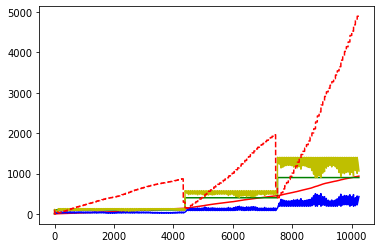

In [321]:
start = time.time()
print(episode(rule_fish,168,62))
print(time.time()-start)

In [286]:
# Simple eval
score = 0
lowest = [0, episode(rule_fish,168,0)]
highest = [0,episode(rule_fish,168,0)]
for seed in range(1,100):
    print(seed)
    a = episode(rule_fish,168,seed)
    score += 0.01 * a
    if lowest[1] > a:
        lowest = [seed,a]
    if highest[1] < a:
        highest = [seed,a]
print(lowest,highest,score)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[62, 5324.180079556243] [43, 465722.9109302225] 125193.33176122456


In [317]:
from RestrictedPython import compile_restricted, Eval, Guards, utility_builtins,safe_builtins


def make_policy():
    p_globals = {'__builtins__': safe_builtins, **utility_builtins} 
    p_globals['__builtins__']['__metaclass__'] = type
    p_globals['__builtins__']['__name__'] = type

    p_globals['__builtins__']['min'] = min
    p_globals['__builtins__']['max'] = max

    p_globals['_getattr_'] = Guards.safer_getattr
    p_globals['_write_'] = Guards.full_write_guard
    p_globals['_getiter_'] = Eval.default_guarded_getiter
    p_globals['_getitem_'] = Eval.default_guarded_getitem
    p_globals['_iter_unpack_sequence_'] = Guards.guarded_iter_unpack_sequence

    return p_globals

#make_policy()

source = '''
def fish(a,b,c,d,e,f,g,h,*args,**kwargs):
    cc=lambda x:(100*x**2)
    def gg(c,d):
        u,y=c,0
        for i in range(60):
            v=c*0.02*min([d/p,1])
            if d<=0:
                v=0
            y=y+v
            w=v*(1-c/p)
            x=max(0,c*0.001*1.5*(2-d/p))
            d=max(0,d-v)
            c=max(c+w-x,0)
        return c-u-y*f
    def eg(c,i,j):
        ii=gg(c,i)
        jj=gg(c,j)
        if i>=j:
            return ii,i
        elif jj>ii:
            return eg(c,max((j+i)//2,i+1),j)
        else:
            return eg(c,i,min((j+i)//2,j-1))
    def ee(i,j):
        ii,fi, jj, fj=0,0,0,0
        z=p*(1.2+e*0.12)
        if z < d//1+(b+j-i-1)//f:
            ii = gg(i,z)
            fi = z
            jj = gg(j,z)
            fj = z
        else:
            ii,fi=eg(i,0,d//1+(b+j-i-1)//f)
            jj,fj=eg(j,0,d//1+(b+j-i-1)//f)
        if i>=j:
            return i, fi
        if jj>ii:
            return ee(max((j+i)//2,i+1),j)
        else:
            return ee(i,min((j+i)//2,j-1))
    l,m,n,o,p = 0,0,0,0,cc(e)
    if not c:
        n=b/g/1.5 if not c else 0
        b=b-g*n
        q,m=eg(n,0,min(p*5,(b-1)//f))
    else:
        q,r=ee(0,c//1)
        l,m=max(0,c-q),max(0,r-d)
        b=b+l-n*m
        if a<140:
            if e < 6:
                if b>h*cc(e+1)*1.5:
                    o=1
            elif e < 16:
                if b>h*cc(e+2)*1.2:
                    o=2
    return [l,m,n,o], [], {}

    '''

byte_code = compile_restricted(source, '<string>', 'exec')
exec(byte_code, make_policy())
